**Уровень 1:**  
1. Найдите спектральное разложение матрицы [[1, 2], [2, 3]].

In [1]:
import numpy as np

m = np.array([[1, 2], [2, 3]], dtype=float)
print(f"Исходная матрица:\n{m}")

lmd, vec = np.linalg.eig(m)
a = vec
b = np.diag(lmd)
c = np.linalg.inv(vec)
print(f"Компоненты разложения:\n{a}\n{b}\n{c}")

n = a.dot(b).dot(c)
print(f"Проверка:\n{n}")

Исходная матрица:
[[1. 2.]
 [2. 3.]]
Компоненты разложения:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
[[-0.23606798  0.        ]
 [ 0.          4.23606798]]
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
Проверка:
[[1. 2.]
 [2. 3.]]


2. Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.  
У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.  
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.  
В качестве справки можно использовать:  
Документация по PCA:  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
Документация по MSE:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html  
Картинки цифр можно взять отсюда:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

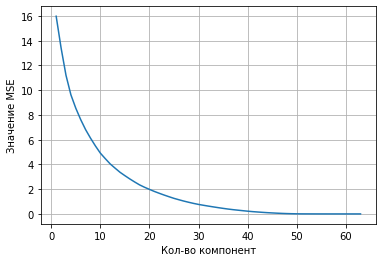

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

res_x = []
res_y = []
X, _ = load_digits(return_X_y=True)
for i in range(1, len(X[0])):
    pca = PCA(n_components=i)
    pca.fit(X)
    TR = pca.transform(X)
    INV = pca.inverse_transform(TR)
    mse = mean_squared_error(X, INV)
    res_x.append(i)
    res_y.append(mse)

plt.xlabel("Кол-во компонент")
plt.ylabel("Значение MSE")
plt.grid(b=True, which='major')
plt.plot(res_x, res_y)
plt.show()

**Уровень 0**  
1. Придумайте матрицы, которые обладают следующими свойствами:  
a) диагональная, ортогональная, но не единичная(!):  
b) верхнетреугольная, ортогональная:  
c) нижнетреугольная, ортогональная:  
d) матрица, у которой определитель = 1, и все элементы не равны 0:  
P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [3]:
import numpy as np

def is_orto(a):  
    dot = np.dot(a, a.T)
    return (dot == np.eye(len(dot))).all()

a = np.diag([-1, 1, -1])
d = np.array([[-3, -3, 2], [-2, 1, -5], [8, 4, 3]])

if (is_orto(a)):
    print("a) Диагональная ортогональная:\n", a)
print("""b) Верхнетреугольная ортогональная будет являться диагональной ортогональной.
Это так, поскольку для верхнетреугольной ее обратная матрица будет тоже верхнетреугольной,
а транпонированная - нижнетреугольной. Однако, ортогональная матрица требует,
чтобы ее обратная и транспонированная матрицы были равны. Это возможно лишь тогда,
когда элементы по обе стороны от главной диагонали равны нулю.
c) Аналогично случаю b""")
if (np.linalg.det(d) == 1):
    print("d) Определитель равен 1 и все элементы ненулевые:\n", d)

a) Диагональная ортогональная:
 [[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
b) Верхнетреугольная ортогональная будет являться диагональной ортогональной.
Это так, поскольку для верхнетреугольной ее обратная матрица будет тоже верхнетреугольной,
а транпонированная - нижнетреугольной. Однако, ортогональная матрица требует,
чтобы ее обратная и транспонированная матрицы были равны. Это возможно лишь тогда,
когда элементы по обе стороны от главной диагонали равны нулю.
c) Аналогично случаю b
d) Определитель равен 1 и все элементы ненулевые:
 [[-3 -3  2]
 [-2  1 -5]
 [ 8  4  3]]


2. Найдите собственные значения и собственные вектора матрицы [[2, 2], [1, 3]].

In [4]:
m = np.array([[2, 2], [1, 3]], dtype=float)
lmd, vec = np.linalg.eig(m)
print(f"Исходная матрица:\n{m}")
for i in range(len(lmd)):
    print(f"Собственное значение {str(lmd[i])}, собственный вектор {str(vec[:,i])}")

Исходная матрица:
[[2. 2.]
 [1. 3.]]
Собственное значение 1.0, собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0, собственный вектор [-0.70710678 -0.70710678]
